<a href="https://colab.research.google.com/github/Minecka2023/MB_Minetska_3-14/blob/main/LB2_MB_Minetska_3_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  
0                 1.9           130  
1                 1.1           136  
2                 1.3           129  
3                 1

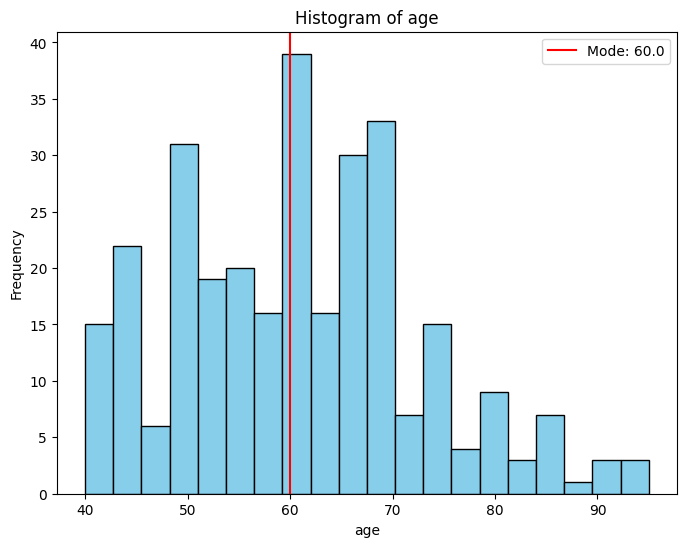

Діапазон для ознаки 'age': [40.0, 95.0]
Найбільша кількість спостережень біля значення: 60.0


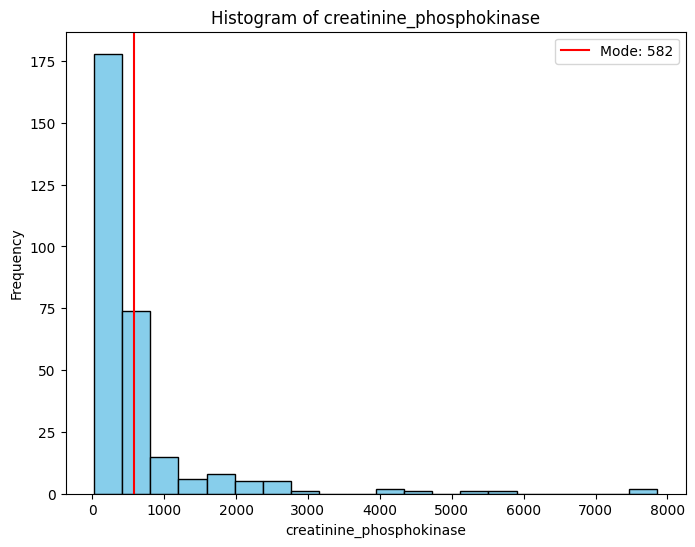

Діапазон для ознаки 'creatinine_phosphokinase': [23, 7861]
Найбільша кількість спостережень біля значення: 582


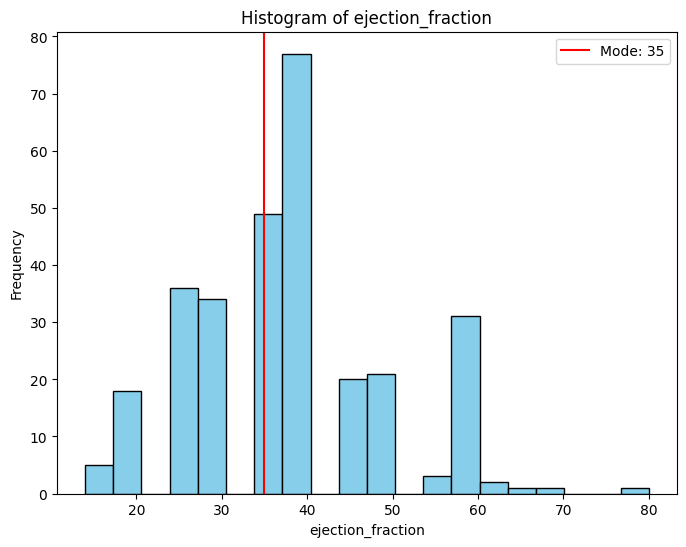

Діапазон для ознаки 'ejection_fraction': [14, 80]
Найбільша кількість спостережень біля значення: 35


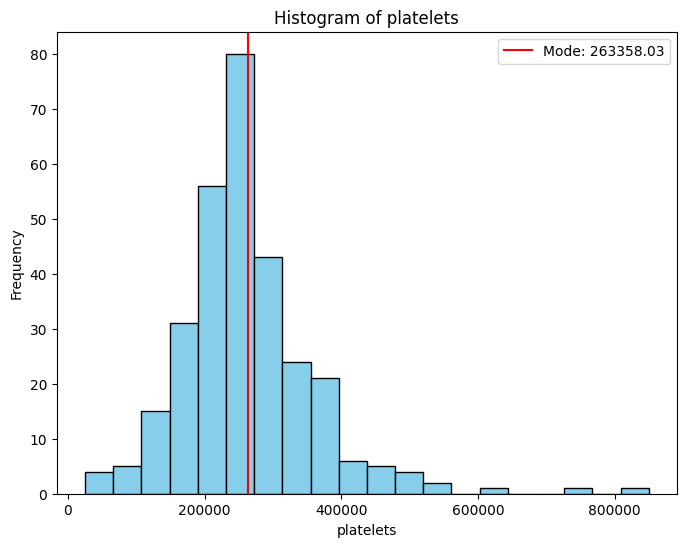

Діапазон для ознаки 'platelets': [25100.0, 850000.0]
Найбільша кількість спостережень біля значення: 263358.03


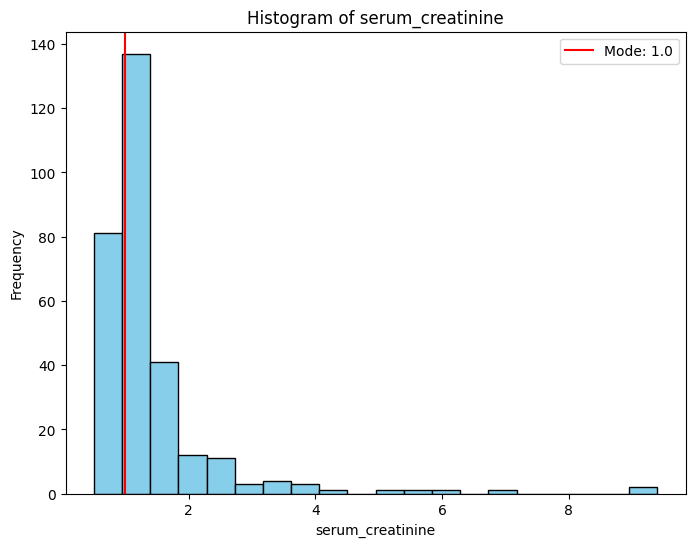

Діапазон для ознаки 'serum_creatinine': [0.5, 9.4]
Найбільша кількість спостережень біля значення: 1.0


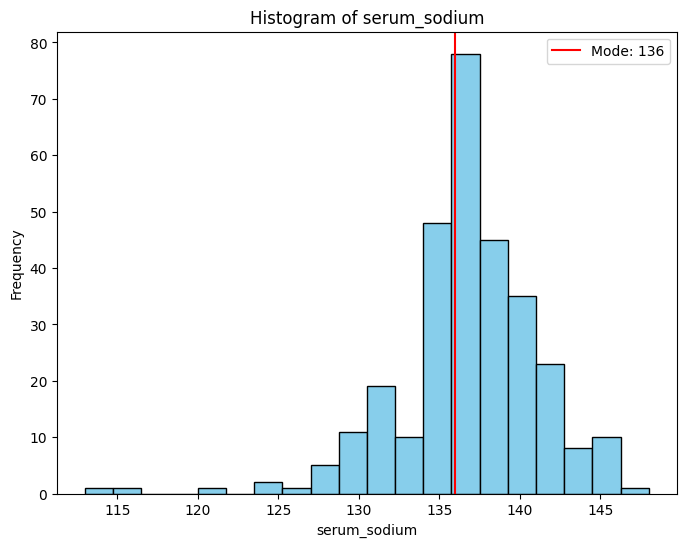

Діапазон для ознаки 'serum_sodium': [113, 148]
Найбільша кількість спостережень біля значення: 136


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Завантаження даних у датафрейм
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Вилучення бінарних ознак та ознаки "час"
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df_filtered = df.drop(columns=binary_features)
df_filtered = df_filtered.drop(columns=['time'])
print(df_filtered)

# Побудова гістограм для кожної ознаки у датафреймі та визначення діапазонів та моди
for column in df_filtered.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df_filtered[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

#На підставі гістограм визначте діапазони значень для кожної ознаки, а також біля якого значення лежить найбільша кількість спостережень
    mode_value = df_filtered[column].mode()[0]
    min_value = df_filtered[column].min()
    max_value = df_filtered[column].max()
    plt.axvline(x=mode_value, color='red', linestyle='-', label=f'Mode: {mode_value}')
    plt.legend()
    plt.show()

    print(f"Діапазон для ознаки '{column}': [{min_value}, {max_value}]")
    print(f"Найбільша кількість спостережень біля значення: {mode_value}")

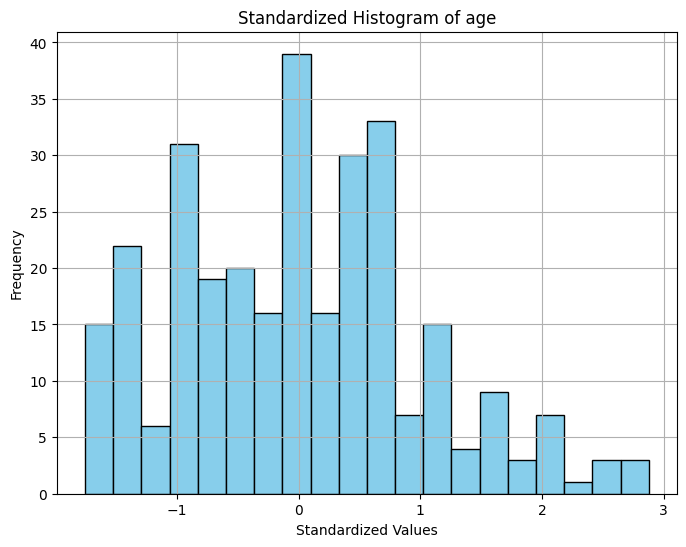

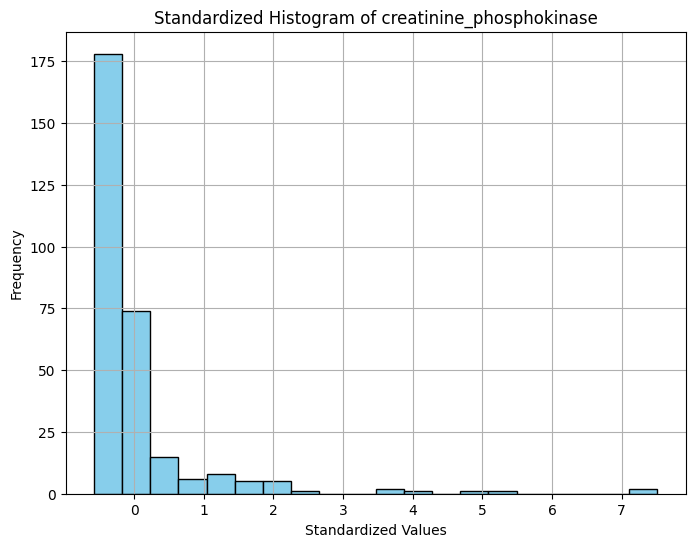

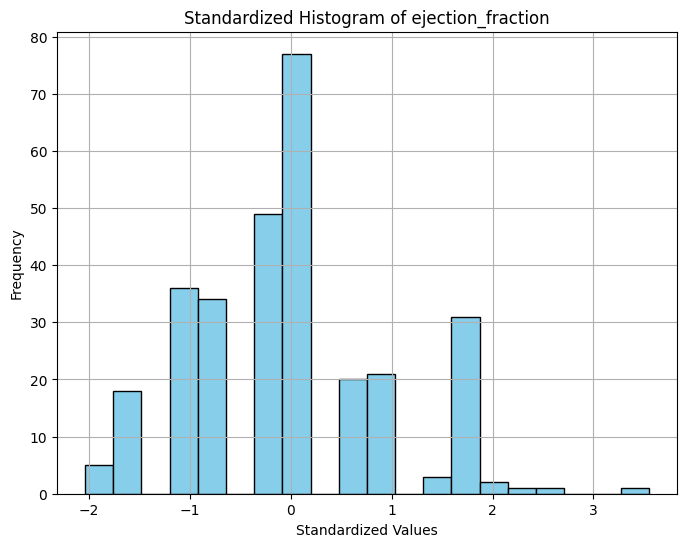

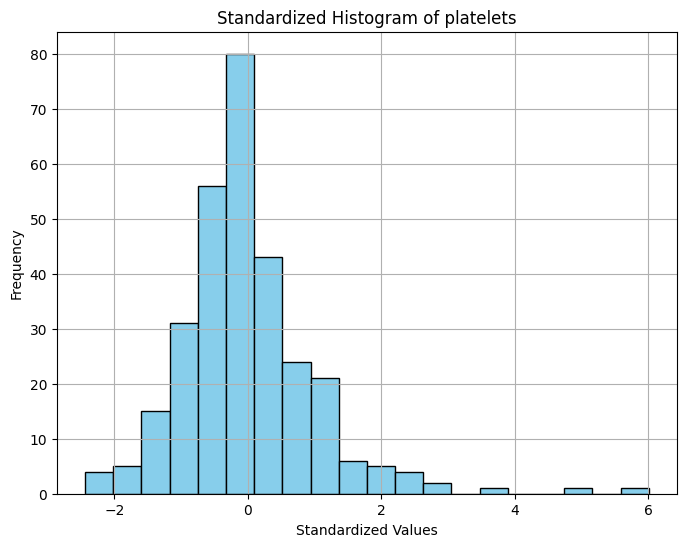

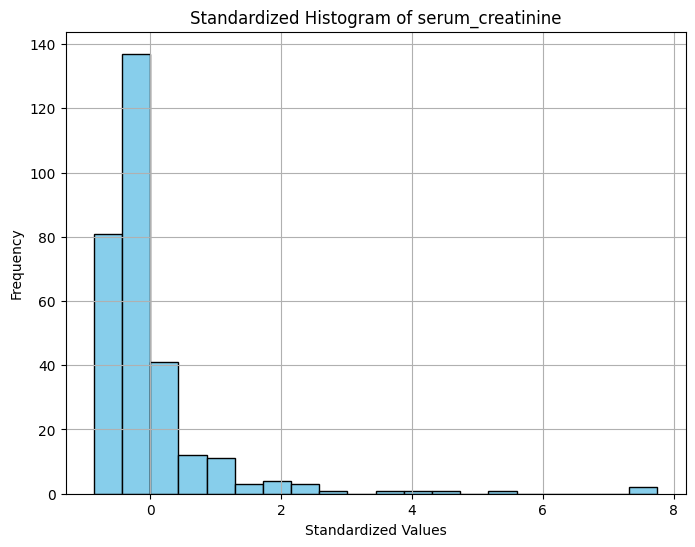

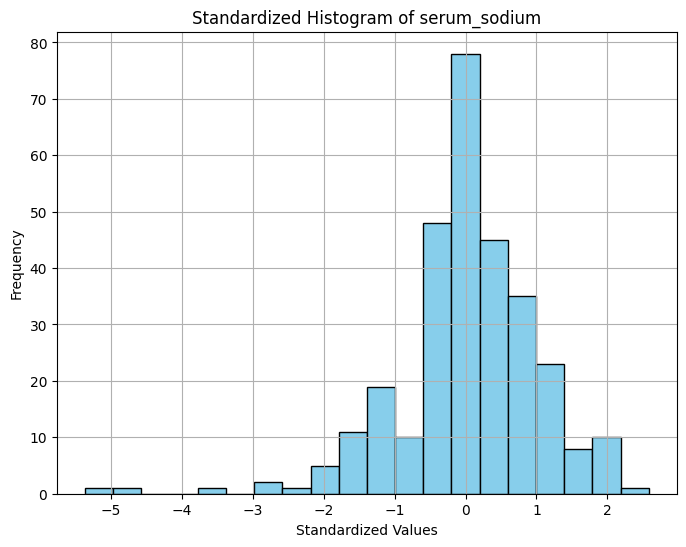

До стандартизації:
              age  creatinine_phosphokinase  ejection_fraction      platelets  \
count  299.000000                299.000000         299.000000     299.000000   
mean    60.833893                581.839465          38.083612  263358.029264   
std     11.894809                970.287881          11.834841   97804.236869   
min     40.000000                 23.000000          14.000000   25100.000000   
25%     51.000000                116.500000          30.000000  212500.000000   
50%     60.000000                250.000000          38.000000  262000.000000   
75%     70.000000                582.000000          45.000000  303500.000000   
max     95.000000               7861.000000          80.000000  850000.000000   

       serum_creatinine  serum_sodium  
count         299.00000    299.000000  
mean            1.39388    136.625418  
std             1.03451      4.412477  
min             0.50000    113.000000  
25%             0.90000    134.000000  
50%        

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df_filtered = df.drop(columns=binary_features)
df_filtered = df_filtered.drop(columns=['time'])

scaler = StandardScaler()
scaler.fit(df_filtered)
scaled_data = scaler.transform(df_filtered)

for i, column in enumerate(df_filtered.columns):
    plt.figure(figsize=(8, 6))
    plt.hist(scaled_data[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Standardized Histogram of {column}')
    plt.xlabel('Standardized Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

print("До стандартизації:")
print(df_filtered.describe())
print("\nПісля стандартизації:")
print(pd.DataFrame(scaled_data, columns=df_filtered.columns).describe())


mean_before = df_filtered.mean()
std_before = df_filtered.std()
mean_after = scaler.mean_
std_after = np.sqrt(scaler.var_)

print("Математичне очікування та СКО до стандартизації:")
print(pd.DataFrame({'Mean Before': mean_before, 'Std Before': std_before}))
print("\nМатематичне очікування та СКО після стандартизації:")
print(pd.DataFrame({'Mean After': mean_after, 'Std After': std_after}))

print("Порівняння значень формул з полями mean_ і var_:")
for i, column in enumerate(df_filtered.columns):
    mean_formula = mean_before[i]
    std_formula = std_before[i]
    mean_scaler = scaler.mean_[i]
    std_scaler = np.sqrt(scaler.var_[i])
    print(f"Ознака: {column}")
    print(f"Формула: (x - {mean_formula}) / {std_formula}")
    print(f"Scikit-learn: (x - {mean_scaler}) / {std_scaler}")
    print()

scaler_alldata = StandardScaler()
scaler_alldata.fit(df_filtered)

print("Порівняння налаштувань стандартизації:")
print("Для перших 150 спостережень:")
print(scaler.mean_)
print(scaler.var_)
print("\nДля всіх даних:")
print(scaler_alldata.mean_)
print(scaler_alldata.var_)

Дані після приведення до рівномірного розподілу:
[[0.88383838 0.70707071 0.04545455 0.5959596  0.87878788 0.05555556]
 [0.34343434 1.         0.54545455 0.55050505 0.48989899 0.39393939]
 [0.66161616 0.33557047 0.04545455 0.11557789 0.6969697  0.04001177]
 ...
 [0.08585859 0.94408081 0.93434343 0.99644772 0.12121212 0.63131313]
 [0.08585859 0.95972912 0.54545455 0.06793077 0.74747475 0.8030303 ]
 [0.2020202  0.42253521 0.76767677 0.92961086 0.78787879 0.39393939]]


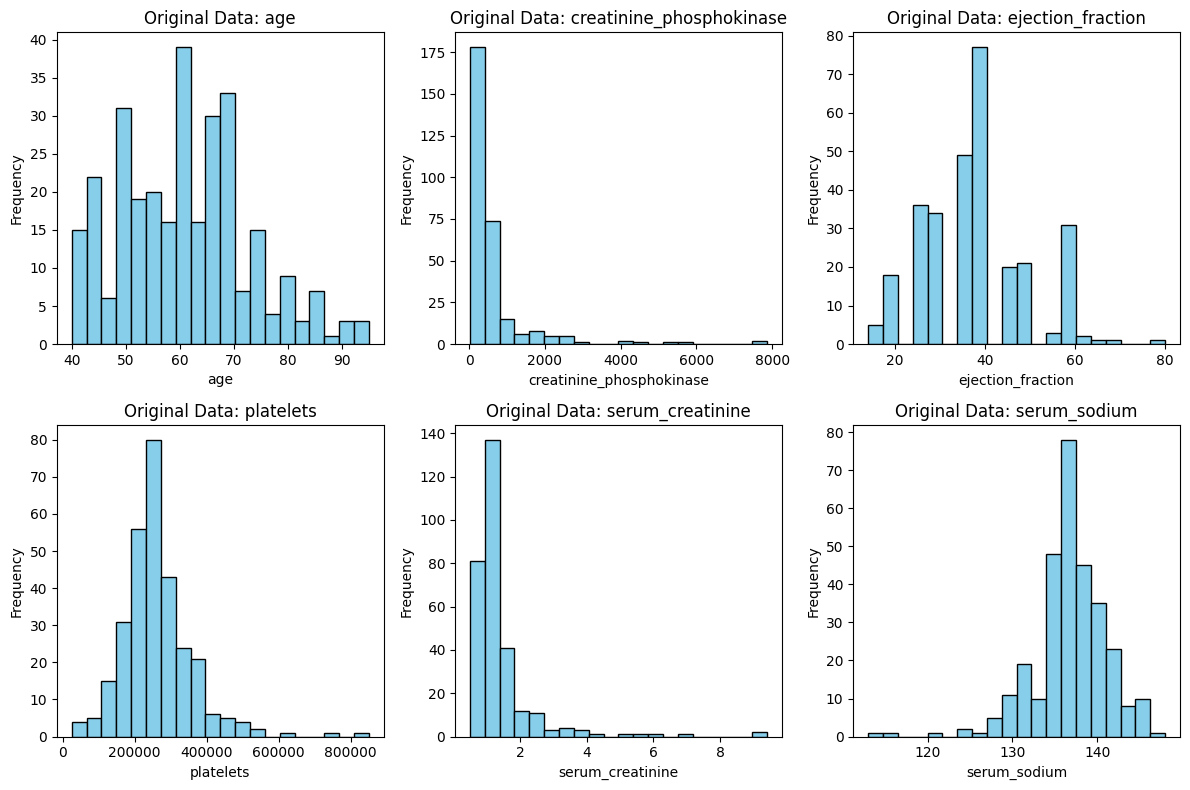

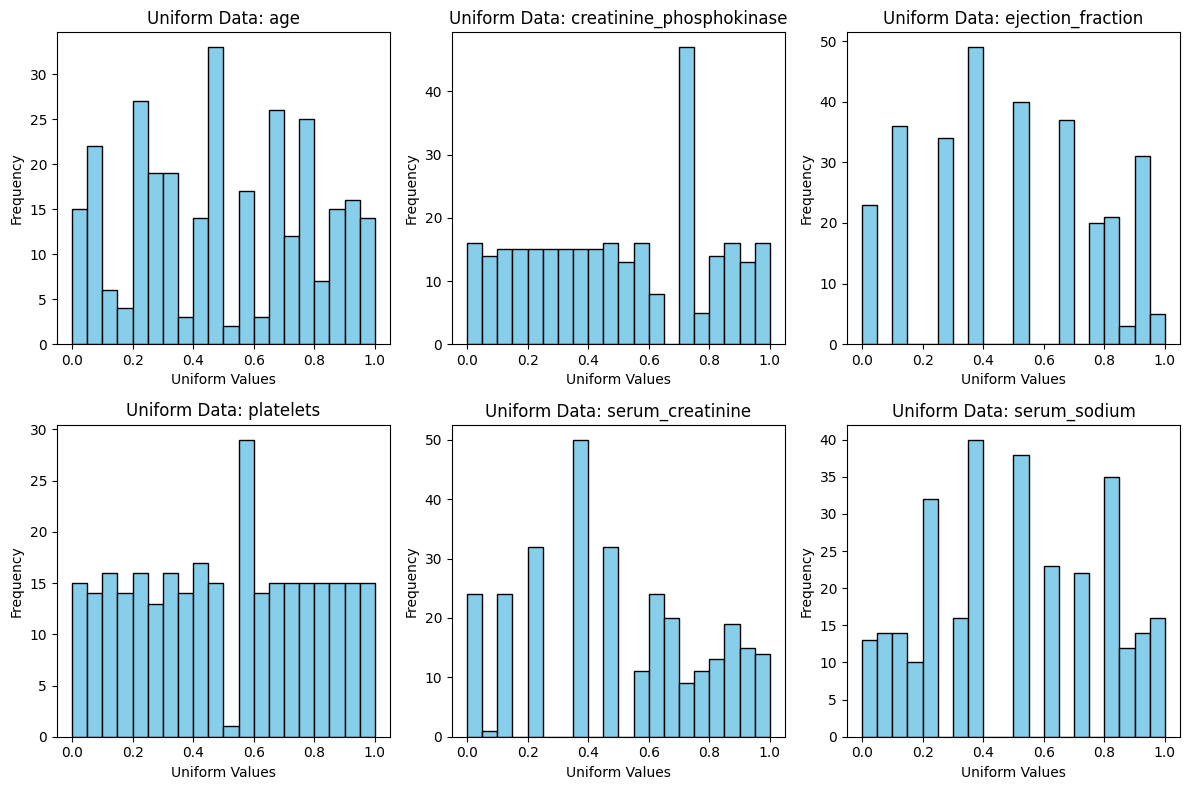

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df_filtered = df.drop(columns=binary_features)
df_filtered = df_filtered.drop(columns=['time'])

n_quantiles = 100
scaler = QuantileTransformer(n_quantiles=n_quantiles, random_state=0, output_distribution='uniform')
uniform_data = scaler.fit_transform(df_filtered)

print("Дані після приведення до рівномірного розподілу:")
print(uniform_data)

plt.figure(figsize=(12, 8))
for i, column in enumerate(df_filtered.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(df_filtered[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Original Data: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, column in enumerate(df_filtered.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(uniform_data[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Uniform Data: {column}')
    plt.xlabel('Uniform Values')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
from sklearn.preprocessing import QuantileTransformer

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df_filtered = df.drop(columns=binary_features)
df_filtered = df_filtered.drop(columns=['time'])

scaler = QuantileTransformer(output_distribution='normal')
normal_data = scaler.fit_transform(df_filtered)

print("Дані після приведення до нормального розподілу:")
print(normal_data)

Дані після приведення до нормального розподілу:
[[ 1.1878327   0.54770771 -1.69222004  0.24640449  1.15443433 -1.58005636]
 [-0.39712516  5.19933758  0.10533829  0.11803457 -0.02103031 -0.25943191]
 [ 0.41081519 -0.42458265 -1.69222004 -1.19639199  0.51861844 -1.76728083]
 ...
 [-1.33704468  1.61007012  1.49763469  2.71083461 -1.16266255  0.33416503]
 [-1.33704468  1.74757924  0.10533829 -1.51067026  0.66396704  0.84883492]
 [-0.84282047 -0.19897554  0.72280669  1.47230106  0.79575492 -0.25943191]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (299). n_quantiles is set to n_samples.
  warnings.warn(


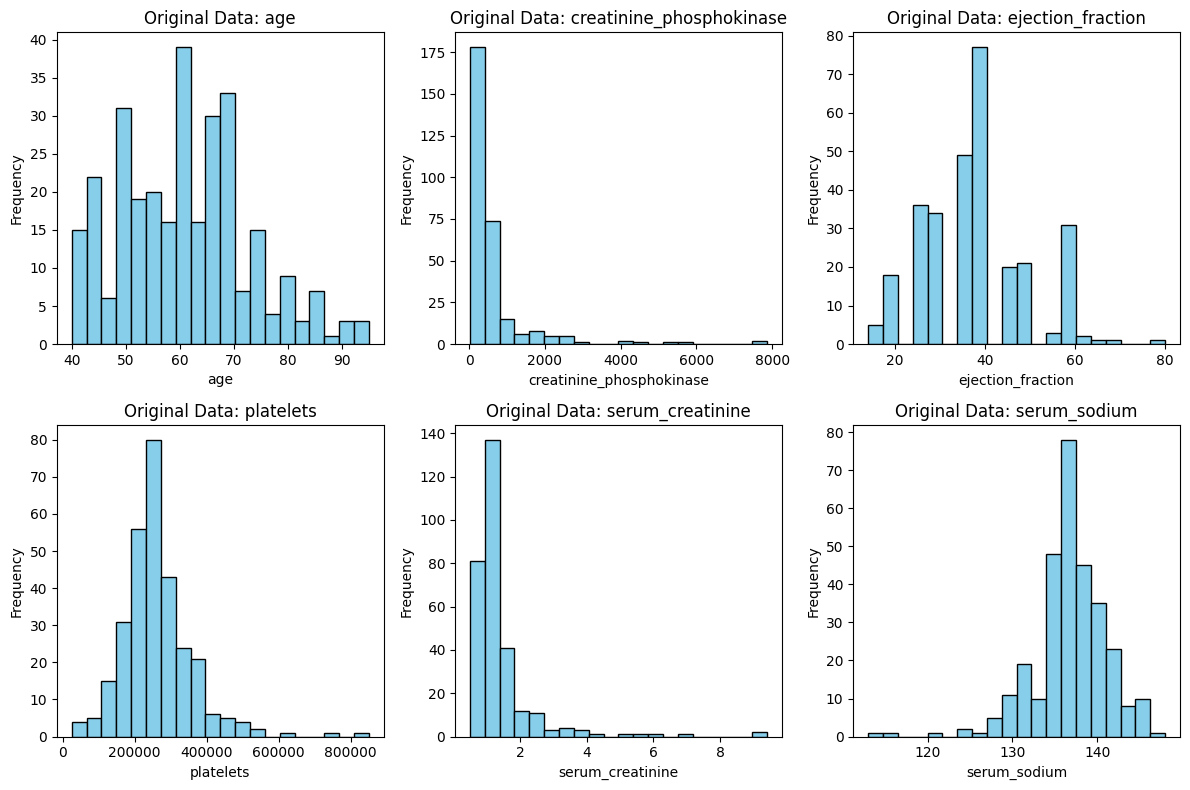

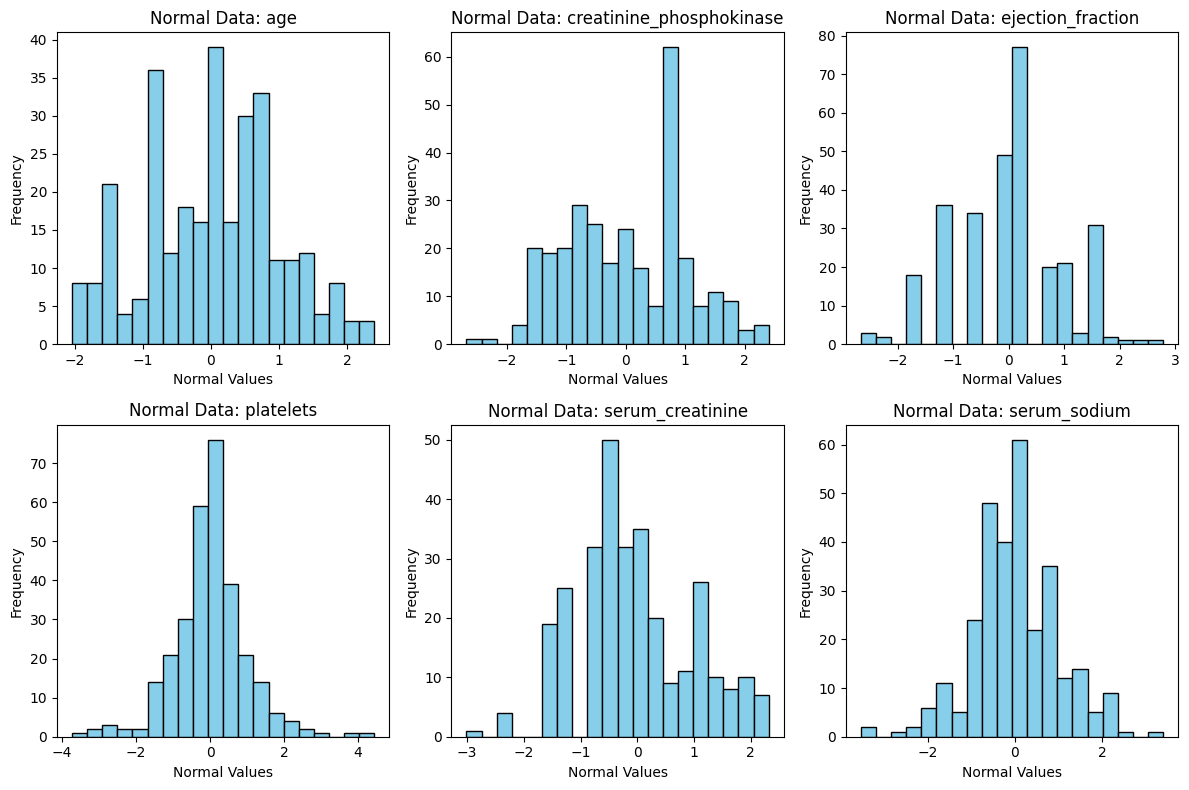

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df_filtered = df.drop(columns=binary_features)
df_filtered = df_filtered.drop(columns=['time'])

scaler = PowerTransformer()
normal_data = scaler.fit_transform(df_filtered)

plt.figure(figsize=(12, 8))
for i, column in enumerate(df_filtered.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(df_filtered[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Original Data: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, column in enumerate(df_filtered.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(normal_data[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Normal Data: {column}')
    plt.xlabel('Normal Values')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Діапазони кожного інтервалу для ознаки 'age':
Interval 1: 40.0 - 58.33333333333333
Interval 2: 58.33333333333333 - 76.66666666666666
Interval 3: 76.66666666666666 - 95.0

Діапазони кожного інтервалу для ознаки 'creatinine_phosphokinase':
Interval 1: 23.0 - 1982.5
Interval 2: 1982.5 - 3942.0
Interval 3: 3942.0 - 5901.5
Interval 4: 5901.5 - 7861.0

Діапазони кожного інтервалу для ознаки 'ejection_fraction':
Interval 1: 14.0 - 36.0
Interval 2: 36.0 - 58.0
Interval 3: 58.0 - 80.0

Діапазони кожного інтервалу для ознаки 'platelets':
Interval 1: 25100.0 - 107590.0
Interval 2: 107590.0 - 190080.0
Interval 3: 190080.0 - 272570.0
Interval 4: 272570.0 - 355060.0
Interval 5: 355060.0 - 437550.0
Interval 6: 437550.0 - 520040.0
Interval 7: 520040.0 - 602530.0
Interval 8: 602530.0 - 685020.0
Interval 9: 685020.0 - 767510.0
Interval 10: 767510.0 - 850000.0

Діапазони кожного інтервалу для ознаки 'serum_creatinine':
Interval 1: 0.5 - 4.95
Interval 2: 4.95 - 9.4

Діапазони кожного інтервалу для ознаки

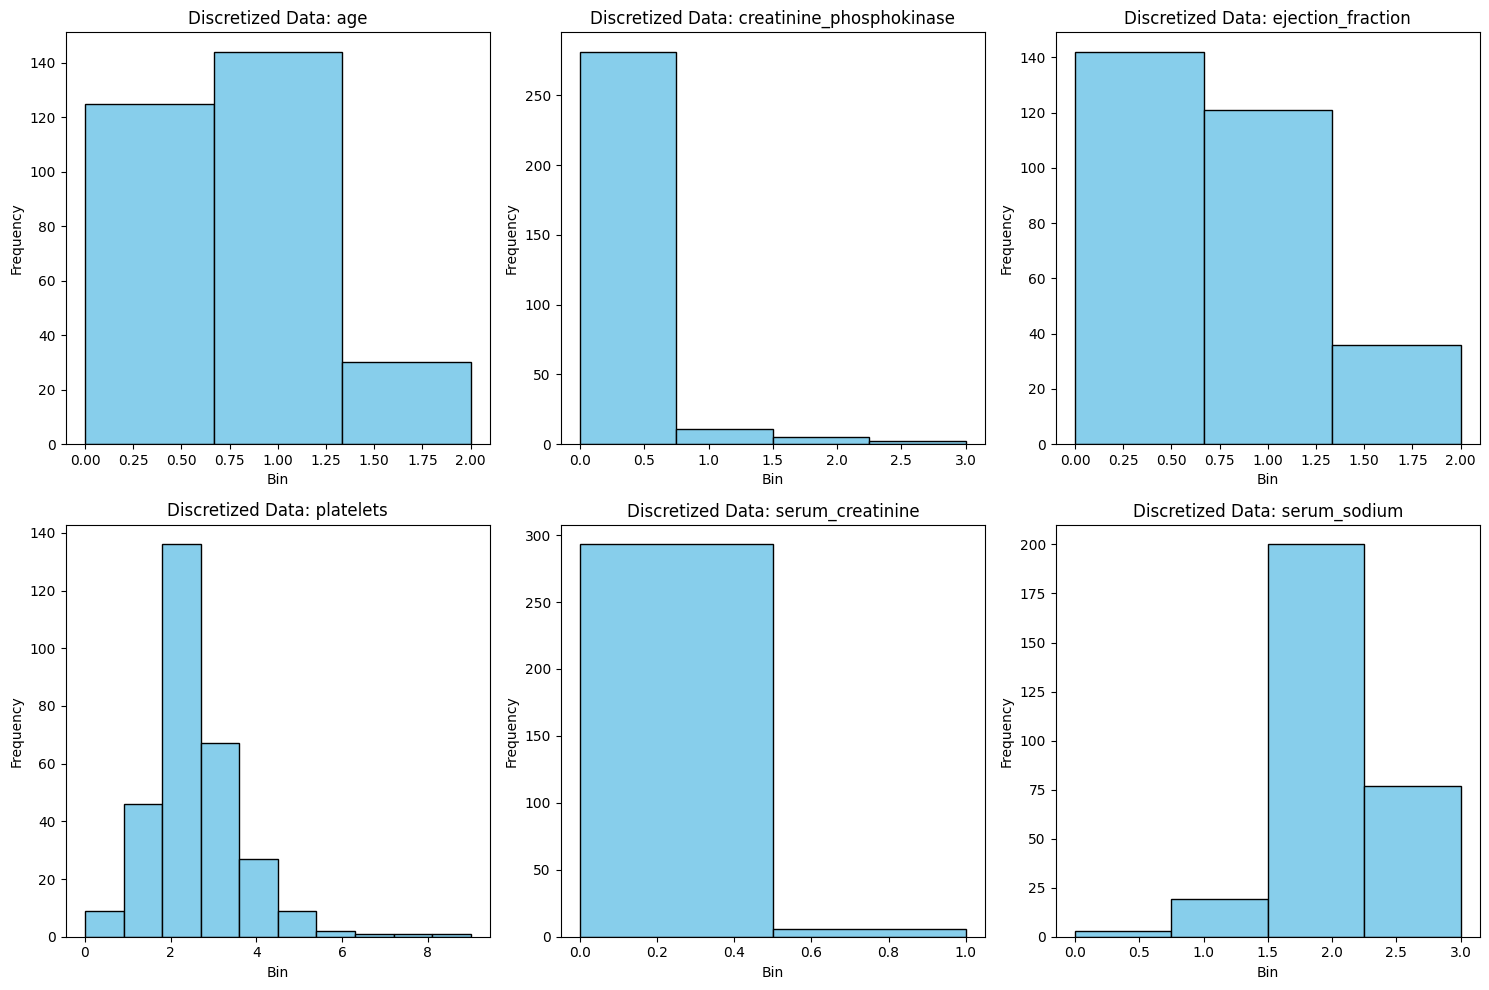

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

discretizer = KBinsDiscretizer(n_bins=[3, 4, 3, 10, 2, 4], encode='ordinal', strategy='uniform')

selected_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
data_to_discretize = df[selected_features]

discretized_data = discretizer.fit_transform(data_to_discretize)

plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_features):
    plt.subplot(2, 3, i+1)
    plt.hist(discretized_data[:, i], bins=discretizer.n_bins_[i], color='skyblue', edgecolor='black')
    plt.title(f'Discretized Data: {column}')
    plt.xlabel('Bin')
    plt.ylabel('Frequency')

    print(f"\nДіапазони кожного інтервалу для ознаки '{column}':")
    for j in range(discretizer.n_bins_[i]):
        print(f"Interval {j + 1}: {discretizer.bin_edges_[i][j]} - {discretizer.bin_edges_[i][j + 1]}")
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

tips_df = pd.read_csv('tips.csv')

print("Перші 5 рядків датасету:")
print(tips_df.head())

print("\nТипи даних кожної ознаки:")
print(tips_df.dtypes)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
tips_df['sex_encoded'] = label_encoder.fit_transform(tips_df['sex'])

tips_df = pd.get_dummies(tips_df, columns=['day'], prefix='day')

tips_df['time_binary'] = tips_df['time'].apply(lambda x: 1 if x == 'Dinner' else 0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_features = ['total_bill', 'tip', 'size']
tips_df[numeric_features] = scaler.fit_transform(tips_df[numeric_features])

# Огляд зміненого датасету після кодування
print("\nОгляд зміненого датасету:")
print(tips_df.head())

Перші 5 рядків датасету:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Типи даних кожної ознаки:
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

Огляд зміненого датасету:
   total_bill       tip     sex smoker    time  size  sex_encoded  day_Fri  \
0    0.291579  0.001111  Female     No  Dinner   0.2            0    False   
1    0.152283  0.073333    Male     No  Dinner   0.4            1    False   
2    0.375786  0.277778    Male     No  Dinner   0.4            1    False   
3    0.431713  0.256667    Male     No  Dinner   0.2            1    False   
4    0.450775  0.290000  Female     No 